In [24]:
!pip install pmdarima


   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --------------------------------------- 625.1/625.1 kB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 40.2 MB/s eta 0:00:00


In [16]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import statsmodels 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/Users/owenk/Downloads/Collaborative Industry Project Spring/final_dma.csv")

dfs = df[df['action'] == 'total']
dfs
values = np.array([0, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511,
                   512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524,
                   525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537,
                   538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550,
                   551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 563, 564,
                   565, 566, 567, 569, 570, 571, 573, 574, 575, 576, 577, 581, 582,
                   584, 588, 592, 596, 597, 598, 600, 602, 603, 604, 605, 606, 609,
                   610, 611, 612, 613, 616, 617, 618, 619, 622, 623, 624, 625, 630,
                   631, 632, 633, 635, 637, 638, 640, 641, 642, 643, 648, 649, 650,
                   651, 652, 657, 658, 659, 661, 669, 670, 671, 675, 676, 678, 679,
                   682, 686, 687, 691, 693, 698, 702, 705, 709, 710, 716, 717, 718,
                   722, 724, 725, 734, 736, 737, 740, 743, 744, 746, 751, 752, 753,
                   754, 755, 756, 757, 758, 759, 760, 762, 764, 765, 766, 767, 770,
                   771, 789, 790, 800, 801, 803, 804, 807, 810, 811, 813, 819, 820,
                   821, 825, 828, 839, 855, 862, 866, 868, 881, 583, 626, 627, 628,
                   634, 636, 639, 644, 647, 656, 662, 673, 692, 711, 745, 747, 749,
                   773, 802, 798])

# Convert the values to a pandas Categorical type
categorical_values = pd.Categorical(values)

# If you want to see the categories
dfs['dma_cat'] = pd.Categorical(dfs['dma'])



C:\Users\owenk\AppData\Local\Temp\ipykernel_33936\4167601274.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['dma_cat'] = pd.Categorical(dfs['dma'])


In [ ]:
dfs

In [17]:
# Aggregate dfs by average hitCount per day
dfsv = dfs.groupby('date', as_index=False)['hitCount'].sum()

# Rename the column to indicate it's an average
dfsv.rename(columns={'hitCount': 'sum_hitcount'}, inplace=True)

# Display the resulting dataframe
print(dfsv)

           date  sum_hitcount
0    2024-06-01        197109
1    2024-06-02        194223
2    2024-06-03        413301
3    2024-06-04        400285
4    2024-06-05        400187
..          ...           ...
289  2025-04-04       9504443
290  2025-04-05       9264660
291  2025-04-06       9824919
292  2025-04-07       9808230
293  2025-04-08       9595327

[294 rows x 2 columns]


In [18]:
dfs.drop(columns=['dma'])
dfs['date'] = pd.to_datetime(dfs['date'])
dfs['pixid'] = dfs['pixid'].astype('category').cat.codes
dfs['day_of_week'] = dfs['date'].dt.dayofweek + 1  # Monday=1, Sunday=7

dfs['hitCount_lag'] = dfs['hitCount'].shift(1)

dfs['is_weekend'] = dfs['day_of_week'].isin([6, 7]).astype(int)

# Drop rows with missing values (due to lagging)
dfs.dropna(inplace=True)

# Let's check the ACF and PACF of the 'hitCount' variable
# First, extract the 'hitCount' column as the time series
ts = dfs['hitCount']

# Plot the ACF and PACF for the time series
#plt.figure(figsize=(12, 6))

# ACF plot (to assess 'q')
#plt.subplot(121)
#plot_acf(ts, lags=40, ax=plt.gca())
#plt.title("ACF - Autocorrelation Function")

# PACF plot (to assess 'p')
#plt.subplot(122)
#plot_pacf(ts, lags=40, ax=plt.gca())
#plt.title("PACF - Partial Autocorrelation Function")

#plt.tight_layout()
#plt.show()

C:\Users\owenk\AppData\Local\Temp\ipykernel_33936\163395168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['date'] = pd.to_datetime(dfs['date'])
C:\Users\owenk\AppData\Local\Temp\ipykernel_33936\163395168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['pixid'] = dfs['pixid'].astype('category').cat.codes
C:\Users\owenk\AppData\Local\Temp\ipykernel_33936\163395168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7921.305, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7918.158, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7919.991, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7919.958, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7916.768, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7921.069, Time=0.14 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.551 seconds
Selected ARIMA order: (0, 1, 0)
Mean Squared Error (MSE): 6186753217215.71
        date  actual_hitCount  predicted_hitCount   lower_99_CI   upper_99_CI
0 2025-03-01         18507972        1.786539e+07 -4.011618e+07  7.584697e+07
1 2025-03-02         19860216        1.786539e+07 -6.413293e+07  9.986372e+07
2 2025-03-03         20363144        1.794974e+07 -8.247729e+07  1.183768e+08
3 2025-03-04         20680310        1.794974e+07 -9.801341e+07  1.339129e+08
4 2025-03-05       

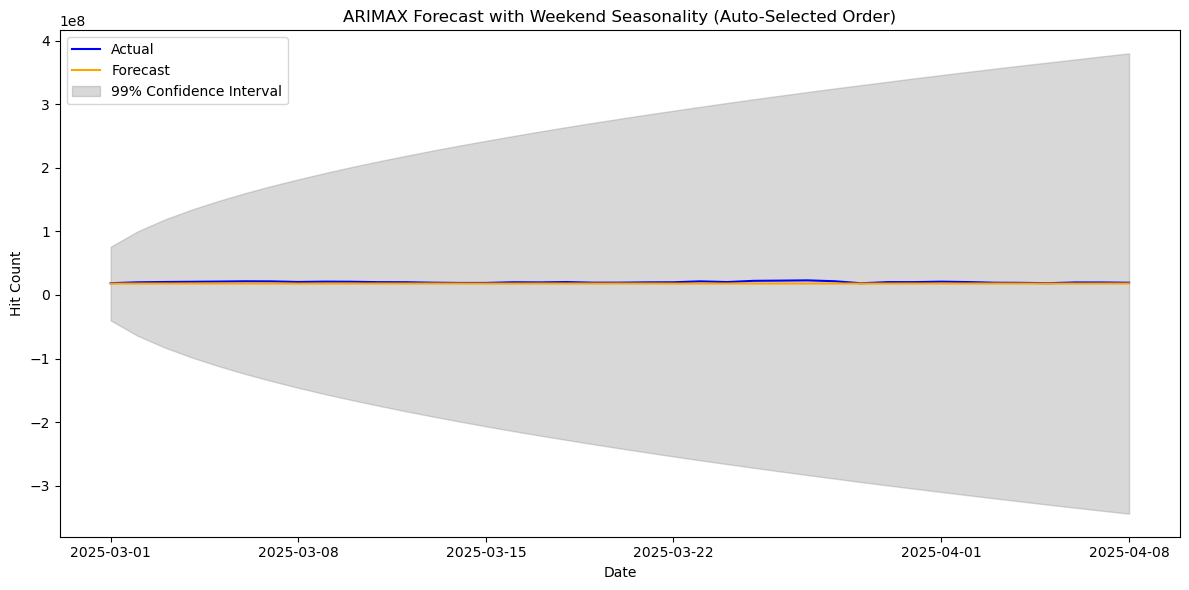

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# 1. Data Prep and Weekend Binary
dfs = df.groupby('date', as_index=False)['hitCount'].sum()

dfs['date'] = pd.to_datetime(dfs['date'])
dfs['day_of_week'] = dfs['date'].dt.dayofweek + 1  # Monday=1, Sunday=7
dfs['is_weekend'] = dfs['day_of_week'].isin([6, 7]).astype(int)

# 2. Define X (exogenous) and y (target)
X = dfs[['is_weekend']]
y = dfs['hitCount']

# 3. Train/Test Split by Date
dfs = dfs.sort_values(by='date')

last_date = dfs['date'].max()
last_month_start = last_date.replace(day=1)
first_of_last_month = last_month_start - pd.DateOffset(months=1)

train_data = dfs[dfs['date'] < first_of_last_month]
test_data = dfs[dfs['date'] >= first_of_last_month]

X_train = train_data[['is_weekend']]
y_train = train_data['hitCount']
X_test = test_data[['is_weekend']]
y_test = test_data['hitCount']

# 4. Use Auto ARIMA to Select Optimal (p, d, q)
auto_model = auto_arima(
    y_train,
    exogenous=X_train,
    seasonal=False,             
    trace=True,                  
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True                
)

print("Selected ARIMA order:", auto_model.order)

# 5. Refit Using statsmodels ARIMA with Found Order
order = auto_model.order
model = ARIMA(y_train, exog=X_train, order=order)
fitted_model = model.fit()

# 6. Forecast with 99% Confidence Intervals
forecast_results = fitted_model.get_forecast(steps=len(X_test), exog=X_test)
forecast_mean = forecast_results.predicted_mean
conf_int = forecast_results.conf_int(alpha=0.01)  # 99% CI

lower_bound = conf_int.iloc[:, 0]
upper_bound = conf_int.iloc[:, 1]

# 7. Evaluate Performance
mse = mean_squared_error(y_test, forecast_mean)
print("Mean Squared Error (MSE):", mse)


# 8. Save Predictions and Confidence Intervals
results_df = pd.DataFrame({
    'date': test_data['date'].values,
    'actual_hitCount': y_test.values,
    'predicted_hitCount': forecast_mean.values,
    'lower_99_CI': lower_bound.values,
    'upper_99_CI': upper_bound.values
})

print(results_df.head())
results_df.to_csv('/Users/owenk/Downloads/Collaborative Industry Project Spring/arimax_auto_predictions.csv', index=False)

# 9. (Optional) Plot Results
plt.figure(figsize=(12, 6))
plt.plot(results_df['date'], results_df['actual_hitCount'], label='Actual', color='blue')
plt.plot(results_df['date'], results_df['predicted_hitCount'], label='Forecast', color='orange')
plt.fill_between(results_df['date'], results_df['lower_99_CI'], results_df['upper_99_CI'],
                 color='gray', alpha=0.3, label='99% Confidence Interval')
plt.title('ARIMAX Forecast with Weekend Seasonality (Auto-Selected Order)')
plt.xlabel('Date')
plt.ylabel('Hit Count')
plt.legend()
plt.tight_layout()
plt.show()
